In [1]:
import os, glob, artm

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
artm.version()

'0.10.0'

In [4]:
batch_vectorizer = None
if len(glob.glob(os.path.join('all_batches_without_single_grams', '*.batch'))) < 1:
    batch_vectorizer = artm.BatchVectorizer(data_path="bag_for_all_manually_without_single_grams.txt", 
                                           data_format="vowpal_wabbit", 
                                           target_folder="all_batches_without_single_grams", 
                                           batch_size=100)
else:
    batch_vectorizer = artm.BatchVectorizer(data_path="all_batches_without_single_grams", data_format='batches')

In [5]:
dictionary = artm.Dictionary()

if not os.path.isfile('dictionary_without_single_grams.txt'):
    dictionary.gather(data_path=batch_vectorizer.data_path)
    #dictionary.save(dictionary_path='dictionary_without_single_grams.dict')
    dictionary.save_text(dictionary_path='dictionary_without_single_grams.txt')

dictionary.load_text(dictionary_path='dictionary_without_single_grams_and_unigrams.txt')

In [28]:
model_artm = artm.ARTM(num_topics=9,
                       dictionary=dictionary,
                       cache_theta=True
                      )

In [29]:
#model_artm.initialize(dictionary=dictionary)

In [30]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore', dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopTokensScore(name="top_words", num_tokens=10))
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.002))

In [31]:
model_artm.num_document_passes = 1

In [32]:
#model_artm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))

0.6924179792404175
0.0021864441223442554


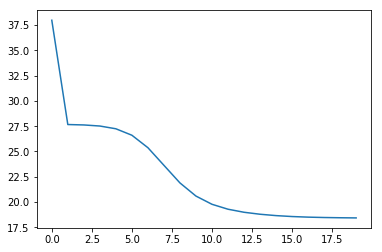

In [33]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)
print(model_artm.score_tracker["SparsityPhiScore"].last_value)
print(model_artm.score_tracker["SparsityThetaScore"].last_value)
plt.plot(model_artm.score_tracker["PerplexityScore"].value)

num_topics: SparsityPhiScore

num_collection_passes=20

DecorrelatorPhi, tau=2.5e+2
12: 0.76
11: 0.74
10: 0.72
9: 0.69
8: 0.65

DecorrelatorPhi, tau=2.5e+1
9: 0.69

DecorrelatorPhi, tau=2.5e+0
9: 0.69

>without DecorrelatorPhi
9: 0.69

DecorrelatorPhi, tau=2.5e+5
9: 0.69

In [34]:
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-225))

0.8458852171897888
0.8886901140213013


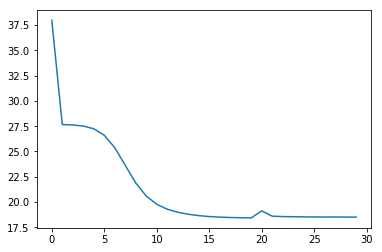

In [35]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
print(model_artm.score_tracker["SparsityPhiScore"].last_value)
print(model_artm.score_tracker["SparsityThetaScore"].last_value)
plt.plot(model_artm.score_tracker["PerplexityScore"].value)

num_topics: SparsityPhiScore, SparsityThetaScore

num_collection_passes=10

SparseTheta, tau=-100
9: 0.83, 0.74

SparseTheta, tau=-200
9: 0.84, 0.87

>SparseTheta, tau=-225
9: 0.84, 0.88

SparseTheta, tau=-250
9: 0.84, 0.89

SparseTheta, tau=-500
9: 0.85, 0.92 - but bad PerplexityScore

SparseTheta, tau=-1000
9: 0.88, 0.95 - but bad PerplexityScore

num_collection_passes=20

SparseTheta, tau=-225
9: 0.84, 0.88

In [36]:
print(model_artm.score_tracker['TopicKernelScore'].last_average_contrast)
print(model_artm.score_tracker['TopicKernelScore'].last_average_purity)

0.7481196522712708
0.9999926090240479


In [37]:
print(model_artm.score_tracker['TopicKernelScore'].last_average_size)
print(model_artm.score_tracker['TopicKernelScore'].last_average_coherence)

17760.333984375
0.0


In [16]:
W=120969
T=9
W/T

13441.0

In [38]:
top_tokens = model_artm.score_tracker['top_words']
for topic_name in model_artm.topic_names:
    print (topic_name)
    try:
        for (token, weight) in zip(top_tokens.last_tokens[topic_name],
                               top_tokens.last_weights[topic_name]):    
             print( token, '-', round(weight,3))
    except:
        pass
    print()

topic_0
среда_выполнение - 0.005
такой_образ - 0.004
логический_процесс - 0.004
модельный_время - 0.003
база_данные - 0.002
блок_обработка - 0.002
html_http - 0.002
представлять_себя - 0.002
домашний_страница - 0.002
описание_модель - 0.002

topic_1
обучать_выборка - 0.004
обнаружение_атака - 0.003
передача_данные - 0.003
w_w - 0.003
такой_образ - 0.002
передача_сообщение - 0.002
директивный_интервал - 0.002
граф_зависимость - 0.002
данный_работа - 0.002
условный_оператор - 0.002

topic_2
библиографический_ссылка - 0.005
такой_образ - 0.003
извлечение_метаинформация - 0.003
научный_статья - 0.003
база_данные - 0.003
виртуальный_сеть - 0.002
экспериментальный_исследование - 0.001
name_val - 0.001
представлять_себя - 0.001
исходный_файл - 0.001

topic_3
время_выполнение - 0.006
порядок_устройство - 0.004
среда_разработка - 0.003
f_f - 0.003
выполнение_программа - 0.003
реальный_время - 0.003
устройство_кольцо - 0.002
кольцо_арбитраж - 0.002
среда_диана - 0.002
такой_образ - 0.002

topic_

In [39]:
phi = model_artm.get_phi()
phi

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
"(@default_class, разрабатывать_параллельный)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, параллельный_процессор)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, проц_параллельный)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, расписание_таблица)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, связность_количество)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, отжиг_таблица)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, режим_тестирование)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, передавать_время)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, разбиение_процесс)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000
"(@default_class, область_время)",0.000000,0.000000,0.000000,0.000000,2.033030e-05,0.000000,0.000000,0.000000e+00,0.00000


In [40]:
theta = model_artm.get_theta()
theta

,200,201,202,203,204,205,206,207,208,209,...,390,391,392,393,394,395,396,397,398,399
topic_0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
topic_1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic_2,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
topic_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
topic_4,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic_5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic_6,0.042909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
topic_7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic_8,0.957091,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
